In [0]:
!unzip images.zip

In [0]:
!unzip models.zip

In [0]:
!unzip data.zip

In [0]:
import pandas as pd

In [0]:
df.head()

## Imports for labelencoding,tensorflow and keras layers.

In [6]:
import os
import json
import numpy as np
import h5py
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import np_utils
import lpr_image_processing

Using TensorFlow backend.


## Running the Image processing file 

In [0]:
!python lpr_image_processing.py

###   """Building CNN model by padding input shape to (40, 140)"""

In [0]:

def build_model():
    """
    build CNN model
    padded input shape is (40, 140)
    """
    
    model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model.add(Flatten())
    model.add(Dense(128,
                    activation='linear'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(29,
                    activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
    return model

In [0]:

def build_model():
    """
    build CNN model
    padded input shape is (40, 140)
    """
    model = Sequential()
    model.add(Conv2D(32,
                     kernel_size=(3, 3),
                     activation='linear',
                     input_shape=(40, 140, 1),
                     padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),
                           padding='same'))
    model.add(Conv2D(64,
                     (3, 3),
                     activation='linear',
                     padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),
                           padding='same'))
    model.add(Conv2D(128,
                     (3, 3),
                     activation='linear',
                     padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),
                           padding='same'))
    model.add(Flatten())
    model.add(Dense(128,
                    activation='linear'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(29,
                    activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
    return model

##    Function to train the model

    """

    model       - Sequential() added with all layers

    train_x     - input features for training

    train_y     - labels for training

    batch_size  - batch size

    epochs      - number of epochs the model should train for

    """



In [0]:
def train_model(model,
                train_x,
                train_y,
                batch_size,
                epochs):

    history = model.fit(train_x,
                      train_y,
                      batch_size=batch_size,
                      epochs=epochs)
    return model, history

### Training and saving the model weights

In [0]:
def train_and_save_model():

    # listing all folders
    folder_list = os.listdir('images/segregated')
    # loading the images
    individual_images, labels = lpr_image_processing.final_extraction(folder_list)
    pad_x, pad_y = lpr_image_processing.determine_max_row_and_column_size(individual_images)
    # padding by resize
    x_train = lpr_image_processing.image_padding_by_resize(individual_images, pad_x, pad_y)
    # encode class values as integers
    # one hot encoding
    encoder = LabelEncoder()
    encoder.fit(labels)
    y_encoded = encoder.transform(labels)
    # convert integers into categorical values
    # by converting it into a bit array form (i.e. one hot encoded)
    y_train = np_utils.to_categorical(y_encoded)
    x_train = np.reshape(x_train, (-1, 40, 140, 1))
    lpr_model = build_model()
    lpr_model.summary()
    lpr_model, _ = train_model(lpr_model, x_train, y_train, 100, 10)
    # save model
    # serialize model to JSON
    model_json = lpr_model.to_json()
    with open("models/lpr.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    lpr_model.save_weights("models/lpr.h5")
    print("Saved model to disk")

In [10]:
train_model

<function __main__.train_model>

In [11]:
train_and_save_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 40, 140, 32)       320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 40, 140, 32)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 70, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 70, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 20, 70, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 35, 128)      

In [0]:
from lpr_image_processing import show_sample ,show_homomorphed_sample

In [0]:
import os
import numpy as np
from skimage import measure
from skimage.io import imread
from skimage.filters import threshold_otsu
from PIL import Image
import scipy.fftpack # For FFT2
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [0]:
#show_sample()

In [0]:
#license_plate = imread("data/crop_h1/I00000.png", as_grey=True)/255.0

In [0]:
#global CSV_FILES

In [0]:
#filtered_data, filtered_labels = homomorphic_filter('/content/images/filtered/1B05002-396.png')

In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('/content/data/trainVal.csv')

In [34]:
df.tail()

,track_id,image_path,lp,train
647,./crop_m4/I00084.png,./crop_h4/I00084.png,2B90178,0
648,./crop_m4/I00085.png,./crop_m4/I00085.png,7B59839,0
649,./crop_m4/I00085.png,./crop_h4/I00085.png,7B59839,0
650,./crop_m4/I00086.png,./crop_m4/I00086.png,7B11123,0
651,./crop_m4/I00086.png,./crop_h4/I00086.png,7B11123,0


In [0]:
folder_list = os.listdir('images/segregated')
    # loading the images
individual_images, labels = lpr_image_processing.final_extraction(folder_list)
pad_x, pad_y = lpr_image_processing.determine_max_row_and_column_size(individual_images)
    # padding by resize
x_train = lpr_image_processing.image_padding_by_resize(individual_images, pad_x, pad_y)
encoder = LabelEncoder()
encoder.fit(labels)
y_encoded = encoder.transform(labels)
    # convert integers into categorical values
    # by converting it into a bit array form (i.e. one hot encoded)
y_train = np_utils.to_categorical(y_encoded)
x_train = np.reshape(x_train, (-1, 40, 140, 1))

In [38]:
lpr_model = build_model()
lpr_model.summary()
lpr_model, _ = train_model(lpr_model, x_train, y_train, 100, 10)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 40, 140, 32)       320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 40, 140, 32)       0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 20, 70, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 70, 64)        18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 20, 70, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 35, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 35, 128)      

Displaying the converted image into a numpy array

In [42]:
y_train[a]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Now we pick a individual sample and perturb it so that a single integer of the license is perturbed to predict zero .










In [0]:
a=0

original_image = x_train[a]
original_image = tf.convert_to_tensor(original_image.reshape((1,40,140))) #The .reshape just gives it the proper form to input into the model, a batch of 1 a.k.a a tensor

original_label = tf.one_hot(y_train[a], 10)

Defining how to create perturbation

In [0]:
def create_perturbation(modelfn, input_image, original_label):
  loss_object = keras.losses.CategoricalCrossentropy()
  
  # Reference the docs for GradientTape in tf2.0 for more info
  with tf.GradientTape() as gt:
    # Define the calculation that needs to be derived
    gt.watch(input_image)
    prediction = modelfn(input_image)
    loss = loss_object(original_label, prediction)
  
  # Get the gradients for the loss w.r.t image
  grads = gt.gradient(loss, input_image)
  perturbation = tf.sign(grads)

  return perturbation

The below code to take the whole plate as input and perform perturbation has some technical limitations as of now for the strides would have to find a way to print the whole license plate as a single perturbed plate.

So instead we go with the process of perturbing the sgregated images.

In [0]:
perturbation = create_perturbation(lpr_model, original_image, original_label)
perturbation_pred = model.predict(perturbation)

plt.figure()
plt.grid(False)
plt.imshow(np.reshape(perturbation,(-1, 40, 140, 1)))
plt.title("Classification of: {}".format(np.argmax(perturbation_pred)))
plt.xlabel("Confidence of: {}".format(np.max(perturbation_pred)))

plt.show()

In [0]:
def fgsm(modelfn, input_image, original_label, epsilon):
  perturbation = create_perturbation(modelfn, input_image, original_label)

  adv_example = input_image + (perturbation * epsilon)

  return adv_example

In [0]:
epsilon = 0.1

adv_image = fgsm(lpr_model, original_image, original_label, epsilon)
adv_image_pred = lpr_model.predict(adv_image)

## Perturbed outputs

In the below predictions we can see that the image  is predicted as label 0 instead of 9 with different kinds of perturbation.

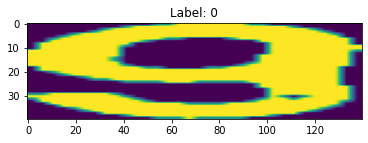

In [44]:
plt.figure()
plt.grid(False)

plt.imshow(np.reshape(adv_image, (40,140)))
plt.title("Label: {}".format(np.argmax(original_label)))

plt.show()

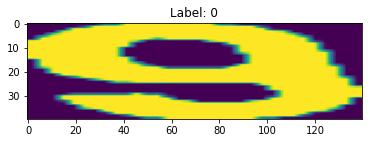

In [53]:
plt.figure()
plt.grid(False)

plt.imshow(np.reshape(adv_image, (40,140)))
plt.title("Label: {}".format(np.argmax(original_label)))

plt.show()

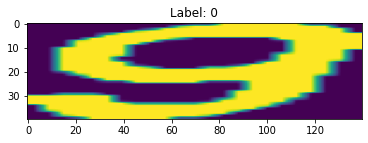

In [55]:
plt.figure()
plt.grid(False)

plt.imshow(np.reshape(adv_image, (40,140)))
plt.title("Label: {}".format(np.argmax(original_label)))

plt.show()

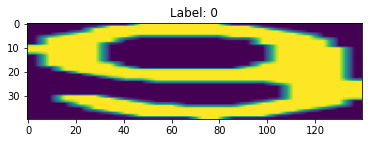

In [57]:
plt.figure()
plt.grid(False)

plt.imshow(np.reshape(adv_image, (40,140)))
plt.title("Label: {}".format(np.argmax(original_label)))

plt.show()

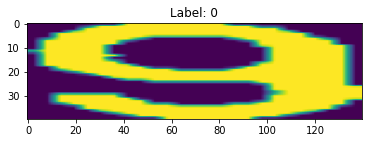

In [59]:
plt.figure()
plt.grid(False)

plt.imshow(np.reshape(adv_image, (40,140)))
plt.title("Label: {}".format(np.argmax(original_label)))

plt.show()

The above are the adverserial images of "9" that can be fed as an integer to this machine learning model to make it predict "0"

In [60]:
!zip -r /content/data.zip /content/data

  adding: content/data/ (stored 0%)
  adding: content/data/crop_h4/ (stored 0%)
  adding: content/data/crop_h4/I00010.png (deflated 0%)
  adding: content/data/crop_h4/I00005.png (deflated 0%)
  adding: content/data/crop_h4/I00077.png (deflated 0%)
  adding: content/data/crop_h4/I00056.png (deflated 0%)
  adding: content/data/crop_h4/I00054.png (deflated 0%)
  adding: content/data/crop_h4/I00002.png (deflated 0%)
  adding: content/data/crop_h4/I00083.png (deflated 0%)
  adding: content/data/crop_h4/I00044.png (deflated 0%)
  adding: content/data/crop_h4/I00004.png (deflated 0%)
  adding: content/data/crop_h4/I00036.png (deflated 0%)
  adding: content/data/crop_h4/I00066.png (deflated 0%)
  adding: content/data/crop_h4/I00046.png (deflated 0%)
  adding: content/data/crop_h4/I00080.png (deflated 0%)
  adding: content/data/crop_h4/I00020.png (deflated 0%)
  adding: content/data/crop_h4/I00006.png (deflated 0%)
  adding: content/data/crop_h4/I00027.png (deflated 0%)
  adding: content/data/c

In [61]:
!zip -r /content/images.zip /content/images

Streaming output truncated to the last 5000 lines.
  adding: content/images/ (stored 0%)
  adding: content/images/segregated/ (stored 0%)
  adding: content/images/segregated/9/ (stored 0%)
  adding: content/images/segregated/9/748.png (deflated 2%)
  adding: content/images/segregated/9/1070.png (deflated 4%)
  adding: content/images/segregated/9/735.png (deflated 5%)
  adding: content/images/segregated/9/216.png (deflated 6%)
  adding: content/images/segregated/9/20.png (deflated 4%)
  adding: content/images/segregated/9/807.png (deflated 9%)
  adding: content/images/segregated/9/765.png (deflated 3%)
  adding: content/images/segregated/9/1837.png (deflated 6%)
  adding: content/images/segregated/9/750.png (deflated 2%)
  adding: content/images/segregated/9/1302.png (deflated 10%)
  adding: content/images/segregated/9/795.png (deflated 10%)
  adding: content/images/segregated/9/260.png (deflated 12%)
  adding: content/images/segregated/9/190.png (stored 0%)
  adding: content/images/seg

In [62]:
!zip -r /content/models.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/lpr.json (deflated 86%)
  adding: content/models/lpr.h5 (deflated 8%)
